import

In [1]:
import os
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

데이터를 Pandas DataFrame으로 변경

In [2]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "../data/adl_fall_all.csv"

# CSV 파일을 DataFrame으로 읽어오기
df = pd.read_csv(file_path)

# head 출력
df.head()

No  Heartbeat  Temperature  Spo2  UserCode     GyroX     GyroY     GyroZ   
0   1         67         36.6    95        33 -0.040861  4.985047  6.510526  \
1   2         60         36.7    99        33 -0.463092  4.372132  7.436710   
2   3         79         36.6    98        33 -0.299648  4.603678  6.510526   
3   4         69         36.6    97        33 -0.272407  4.481094  6.360703   
4   5         65         36.6    98        33 -1.525479  5.175732  7.164303   

        Label  
0  Downstairs  
1  Downstairs  
2  Downstairs  
3  Downstairs  
4  Downstairs

학습 가능한 수준으로 빠르게 전처리

In [3]:
# 결측치 확인
df.isnull().sum()

No             0
Heartbeat      0
Temperature    0
Spo2           0
UserCode       0
GyroX          0
GyroY          0
GyroZ          0
Label          0
dtype: int64

In [4]:
# 결측치가 삭제된 DataFrame 생성
df_cleaned = df.dropna()

In [5]:
# 결측치 삭제 확인
df_cleaned.isnull().sum()

No             0
Heartbeat      0
Temperature    0
Spo2           0
UserCode       0
GyroX          0
GyroY          0
GyroZ          0
Label          0
dtype: int64

In [6]:
# Label 컬럼을 기준으로 라벨별 행 수 계산
Label_counts = df['Label'].value_counts()

# 라벨별 행 수 출력
print(Label_counts)

Label
Walking       406775
Jogging       325975
Upstairs      118589
Downstairs     97813
Standing       44546
fall           32671
Name: count, dtype: int64


In [7]:
# 특성과 타겟 데이터로 분할
X = df_cleaned[['Temperature','Heartbeat','GyroX','GyroY','GyroZ']]
y = df_cleaned['Label']

In [8]:
# 테스트 세트와 트레인 세트로 분할 (70% 트레인, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# 결과 확인
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)
print("X_test:")
print(X_test)
print("y_test:")
print(y_test)

X_train:
        Temperature  Heartbeat  GyroX  GyroY     GyroZ
207645         36.7         77   7.27  -0.53  3.568531
838364         36.7         71  -3.98   4.56 -2.220000
252974         36.7         81 -15.60  14.75  4.180000
733843         36.6         71  13.72   1.42  0.885323
595271         36.7         72   0.50  14.82 -1.307553
...             ...        ...    ...    ...       ...
759363         36.7         82   2.83  16.97  5.790000
535030         36.6         63  -9.30   2.22  0.760000
573977         36.7         66  -0.15  12.22 -4.520000
189636         36.7         85  -8.43  15.40 -0.994285
585903         36.8         76   4.06   4.56 -2.960000

[718458 rows x 5 columns]
y_train:
207645     Jogging
838364     Walking
252974     Jogging
733843     Walking
595271     Walking
            ...   
759363     Walking
535030    Upstairs
573977    Upstairs
189636     Jogging
585903    Upstairs
Name: Label, Length: 718458, dtype: object
X_test:
        Temperature  Heartbeat  Gyr

In [9]:
# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib

# 전처리에 사용된 scaler 객체 생성 및 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# 모델 저장
model_file = "../model/model_knn.pkl"
joblib.dump(knn, model_file)

# scaler 객체 저장
scaler_file = "../model/scaler_knn.pkl"
joblib.dump(scaler, scaler_file)


['../model/scaler_knn.pkl']

독립변수, 종속변수 설정

In [11]:
# 독립변수, 종속변수 설정
X = X_train
y = y_train
print("독립변수 X : ", X)
print("종속변수 Y : ", y)

독립변수 X :  [[ 0.01745096  0.419339    0.95269928 -1.19305892  0.70173135]
 [ 0.01745096 -0.22317402 -0.70726965 -0.4351097  -0.52876374]
 [ 0.01745096  0.84768102 -2.42183311  1.08227785  0.83171417]
 ...
 [ 0.01745096 -0.75860154 -0.14214245  0.70553688 -1.01768549]
 [ 0.01745096  1.27602303 -1.36387958  1.17906901 -0.26820786]
 [ 0.40566577  0.3122535   0.47905481 -0.4351097  -0.686069  ]]
종속변수 Y :  207645     Jogging
838364     Walking
252974     Jogging
733843     Walking
595271     Walking
            ...   
759363     Walking
535030    Upstairs
573977    Upstairs
189636     Jogging
585903    Upstairs
Name: Label, Length: 718458, dtype: object


독립변수 : 체온, 맥박, 자이로스코프 x,y,z축
종속변수 : 활동 레이블

선형 모델을 기반으로 한 모델 생성

In [12]:
kernal_evals = dict() # 모델 평가 결과를 저장할 딕셔너리

# 모델을 평가, 결과를 출력, kernal_evals 딕셔너리에 저장
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall,
                               test_recall]
    print(f"Training Accuracy {name} is {train_accuracy * 100},  Test Accuracy {name} is {test_accuracy * 100}")
    print(f"Training Precesion {name} is {train_precision * 100},  Test Accuracy {name} is {test_precision * 100}")
    print(f"Training Recall {name} is {train_recall * 100},  Test Accuracy {name} is {test_recall * 100}")

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=['LAYING', 'SITTING', 'STANDING', 'WALKING',
                                                                'DOWNSTAIRS', 'UPSTAIRS'])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [113]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

Training Accuracy Logistic Regression is 59.4372023198799,  Test Accuracy Logistic Regression is 59.63031097222922
Training Precesion Logistic Regression is 59.4372023198799,  Test Accuracy Logistic Regression is 59.63031097222922
Training Recall Logistic Regression is 59.4372023198799,  Test Accuracy Logistic Regression is 59.63031097222922


Training Accuracy LinearDiscriminantAnalysis is 59.07431607823654,  Test Accuracy LinearDiscriminantAnalysis is 59.2976664482637
Training Precesion LinearDiscriminantAnalysis is 59.07431607823654,  Test Accuracy LinearDiscriminantAnalysis is 59.2976664482637
Training Recall LinearDiscriminantAnalysis is 59.07431607823654,  Test Accuracy LinearDiscriminantAnalysis is 59.2976664482637


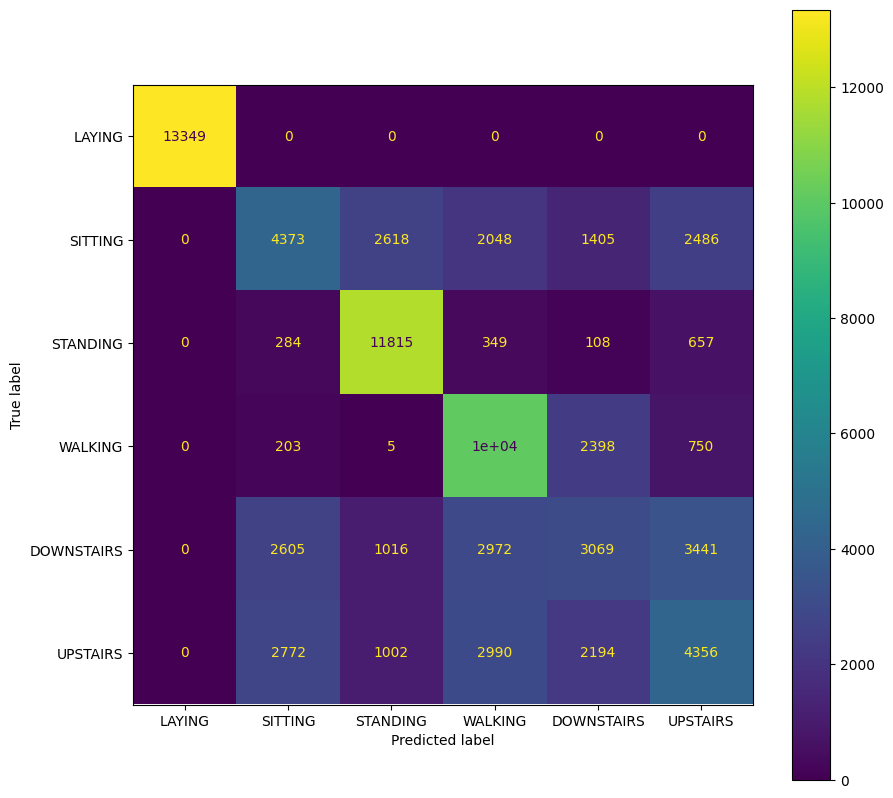

In [114]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", X_train, X_test, y_train, y_test)

In [97]:
# 클래스 인코딩
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.transform(y_test)

# class_mapping = {'Downstairs': 0, 'Jogging': 1, 'Sitting': 2, 'Standing': 3, 'Upstairs': 4, 'Walking': 5}
# y_train = y_train.map(class_mapping)
# y_test = y_test.map(class_mapping)

import pandas as pd

# 판다스 Series로 변환
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# # 클래스 인코딩 매핑 적용
# class_mapping = {'Downstairs': 0, 'Jogging': 1, 'Sitting': 2, 'Standing': 3, 'Upstairs': 4, 'Walking': 5}
# y_train = y_train.map(class_mapping)
# y_test = y_test.map(class_mapping)

Training Accuracy KNeighborsClassifier is 77.02854489097213,  Test Accuracy KNeighborsClassifier is 75.33264452396553
Training Precesion KNeighborsClassifier is 77.02854489097213,  Test Accuracy KNeighborsClassifier is 75.33264452396553
Training Recall KNeighborsClassifier is 77.02854489097213,  Test Accuracy KNeighborsClassifier is 75.33264452396553


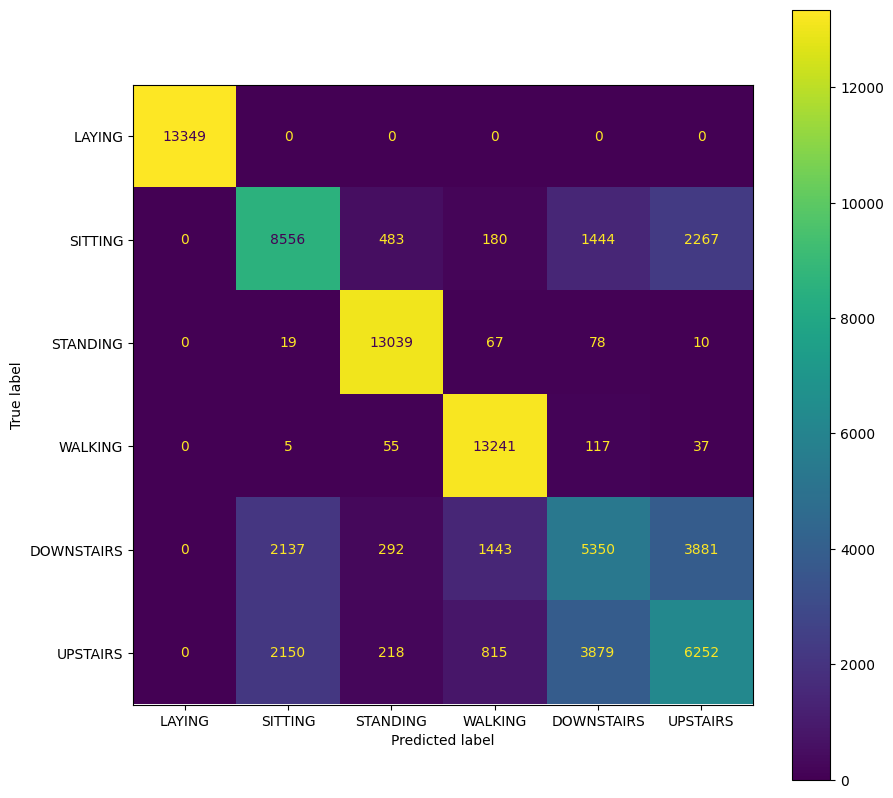

In [115]:
knn = KNeighborsClassifier(n_neighbors=30).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

In [120]:
model_knn = knn
joblib.dump(model_knn, '../model/model_knn.pkl')

['../model/model_knn.pkl']

Training Accuracy GaussianNB is 66.57234504433475,  Test Accuracy GaussianNB is 66.98755103069402
Training Precesion GaussianNB is 66.57234504433475,  Test Accuracy GaussianNB is 66.98755103069402
Training Recall GaussianNB is 66.57234504433475,  Test Accuracy GaussianNB is 66.98755103069402


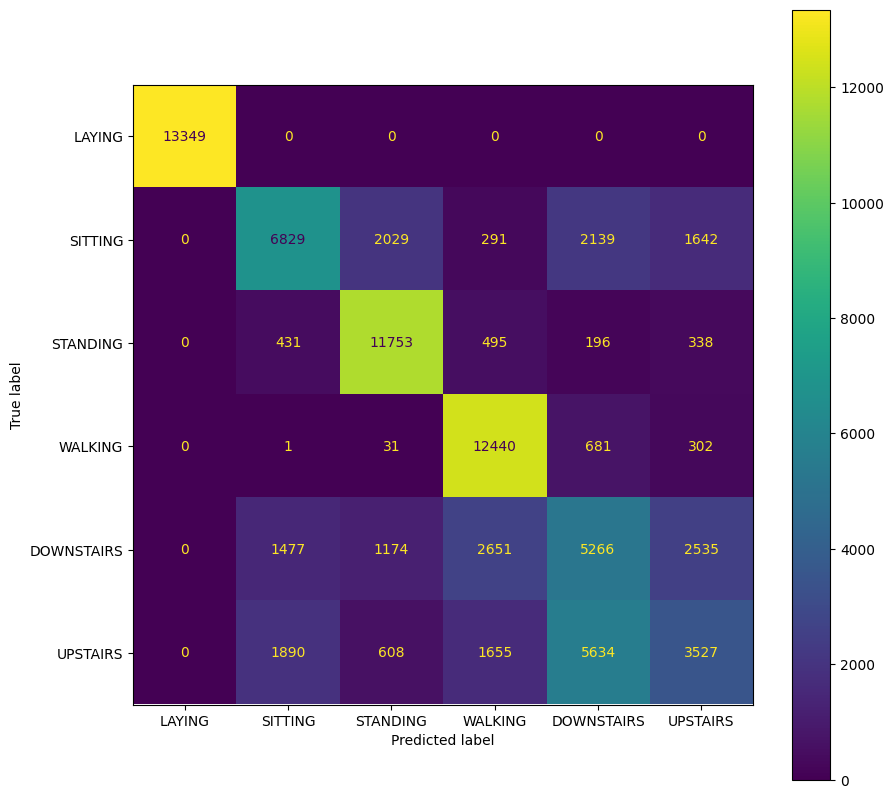

In [116]:
gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

In [117]:
lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

D:\Danu\Project\venv2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) is 57.47048849240207,  Test Accuracy Linear SVC(LBasedImpl) is 57.82344639887103
Training Precesion Linear SVC(LBasedImpl) is 57.47048849240207,  Test Accuracy Linear SVC(LBasedImpl) is 57.82344639887103
Training Recall Linear SVC(LBasedImpl) is 57.47048849240207,  Test Accuracy Linear SVC(LBasedImpl) is 57.82344639887103


Training Accuracy RBF SVC is 73.31004093270404,  Test Accuracy RBF SVC is 73.38591804848545
Training Precesion RBF SVC is 73.31004093270404,  Test Accuracy RBF SVC is 73.38591804848545
Training Recall RBF SVC is 73.31004093270404,  Test Accuracy RBF SVC is 73.38591804848545


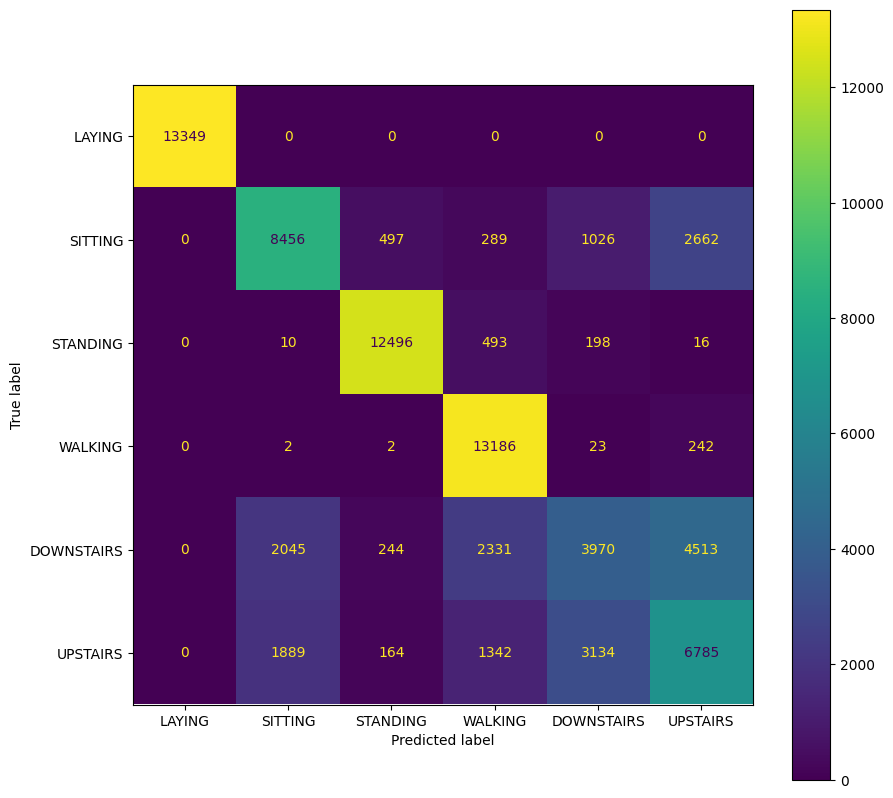

In [118]:
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
evaluate_classification(rbf, "RBF SVC", X_train, X_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier is 99.94005896901427,  Test Accuracy DecisionTreeClassifier is 72.2015019404264
Training Precesion DecisionTreeClassifier is 99.94005896901427,  Test Accuracy DecisionTreeClassifier is 72.2015019404264
Training Recall DecisionTreeClassifier is 99.94005896901427,  Test Accuracy DecisionTreeClassifier is 72.2015019404264


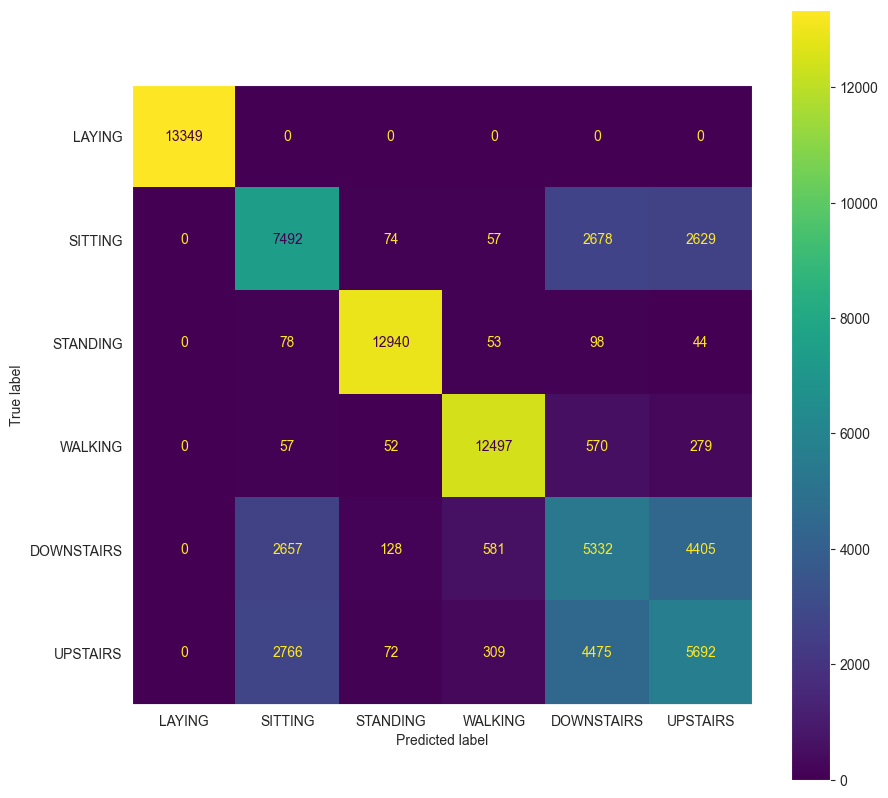

In [14]:
tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

Training Accuracy XGBClassifier is 76.92864317266258,  Test Accuracy XGBClassifier is 76.61912202005948
Training Precesion XGBClassifier is 76.92864317266258,  Test Accuracy XGBClassifier is 76.61912202005948
Training Recall XGBClassifier is 76.92864317266258,  Test Accuracy XGBClassifier is 76.61912202005948


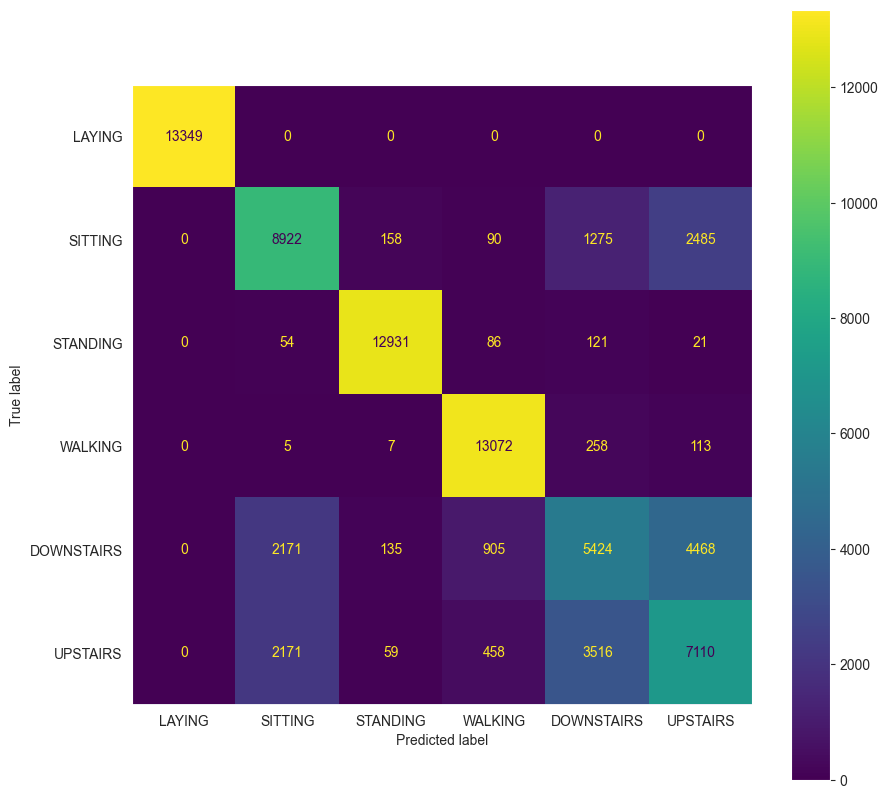

In [14]:
le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
xgb = XGBClassifier(**xgb_params).fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)


In [16]:
model_xgb = xgb
joblib.dump(model_xgb, '../model/model_xgb.pkl')

['../model/model_xgb.pkl']